# HR Analytics Project- Understanding the Attrition in HR
Problem Statement:
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

Importing Necessary Libraries

* Its always better to import all the libraries at one go and it becomes easier.

In [1]:
# loading the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import missingno as msno
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import skew

In [2]:
#loading the dataset
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# EDA

In [3]:
# checking for the shape of the dataset
df.shape

(1470, 35)

* As we can see, we have total 1470 rows and 35 columns in the dataset 

[]

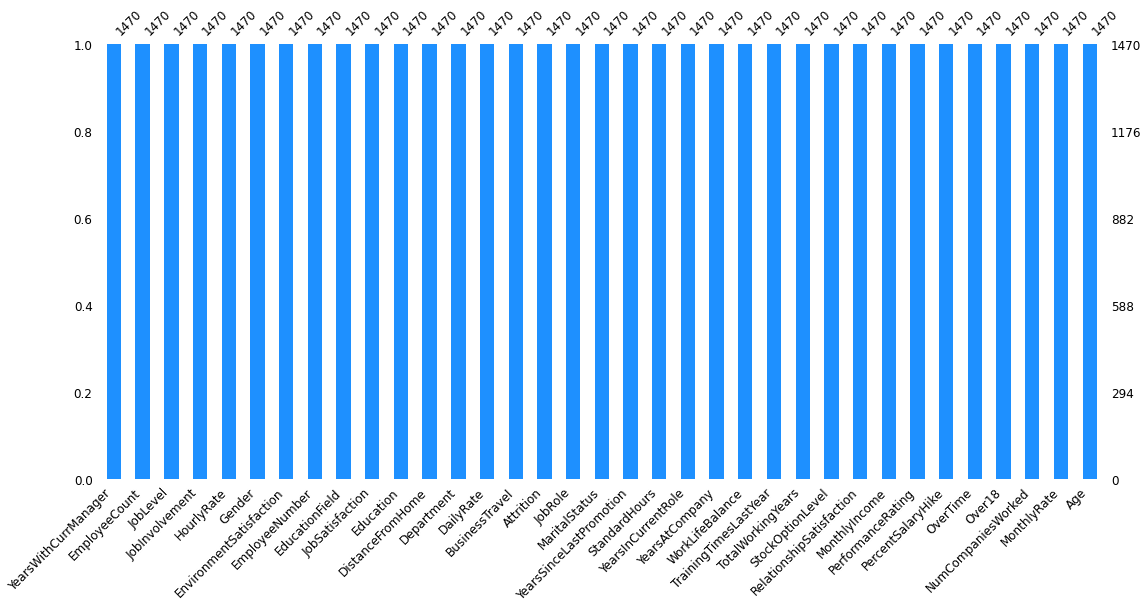

In [4]:
# checking for the missing values in the dataset
msno.bar(df,color='dodgerblue',figsize=(18,8),fontsize=12,sort='descending')
plt.plot()

* As we can see there are no missing values in the data set

In [5]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
# checking the datatypes
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

* As we can see most of the columns are integer and we have 9 objects columns at the same time.

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


###### Observations
* We can see multiple columns have differences between mean and 50% values
* Employee Count and Over18 columns doesnt have any variation. So, we could consider to remove this column.

In [9]:
df.drop(['EmployeeCount','Over18'],axis=1,inplace=True)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,4,80,1,6,3,3,2,2,2,2


In [10]:
# Check the mean value of churn by Age bucket
df.groupby('Attrition')['Age'].mean()

Attrition
No     37.561233
Yes    33.607595
Name: Age, dtype: float64

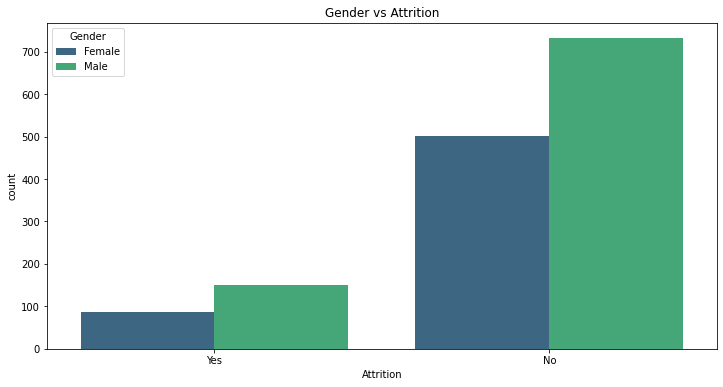

In [11]:
plt.figure(figsize=(12,6))
sns.countplot(x='Attrition',hue='Gender',data=df,palette='viridis')
plt.title("Gender vs Attrition")
plt.show()

* We can clearly notice that the number of churns are higher in Female category at the same time retaining category also Female is dominant

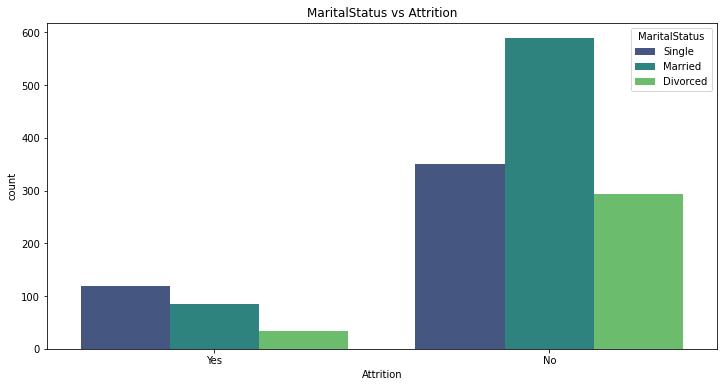

In [12]:
plt.figure(figsize=(12,6))
sns.countplot(x='Attrition',hue='MaritalStatus',data=df,palette='viridis')
plt.title("MaritalStatus vs Attrition")
plt.show()

Observations
* Employees who are single are the ones who are likely to churn more followed by Married and Divorced
* Married are the ones who are more like to retain.

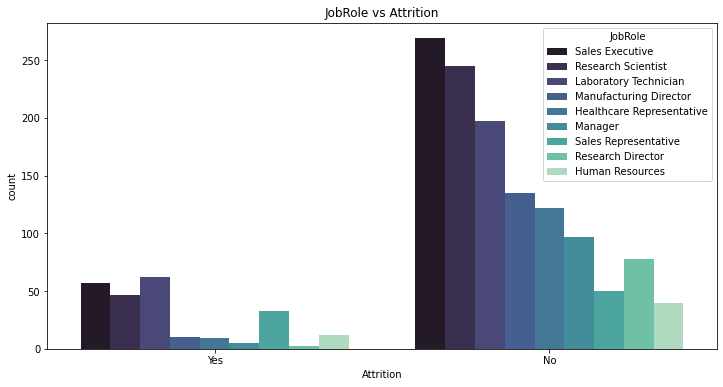

In [13]:
plt.figure(figsize=(12,6))
sns.countplot(x='Attrition',hue='JobRole',data=df,palette='mako')
plt.title("JobRole vs Attrition")
plt.show()

Observation
* The top three categories who likely to churn more are Sales Executive, Research Scientist and Laboratory Technician.

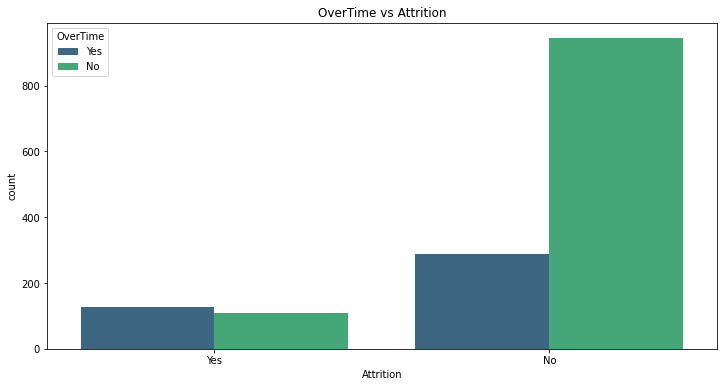

In [14]:
plt.figure(figsize=(12,6))
sns.countplot(x='Attrition',hue='OverTime',data=df,palette='viridis')
plt.title("OverTime vs Attrition")
plt.show()

Observation
* As above, we cannot say that Overtime is affecting too much on Attrition

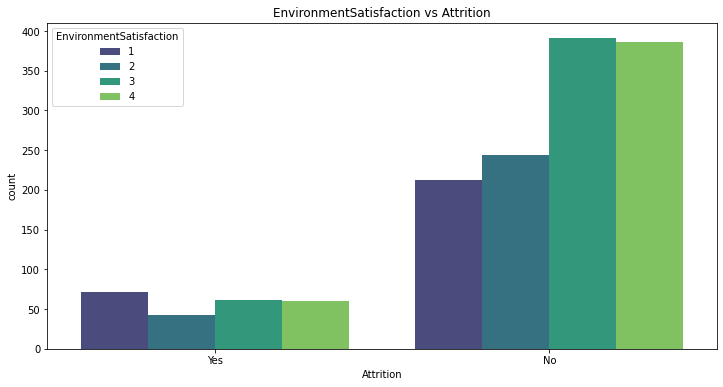

In [15]:
plt.figure(figsize=(12,6))
sns.countplot(x='Attrition',hue='EnvironmentSatisfaction',data=df,palette='viridis')
plt.title("EnvironmentSatisfaction vs Attrition")
plt.show()

Observation
* As above, we cannot say that EnvironmentSatisfaction is affecting too much on Attrition

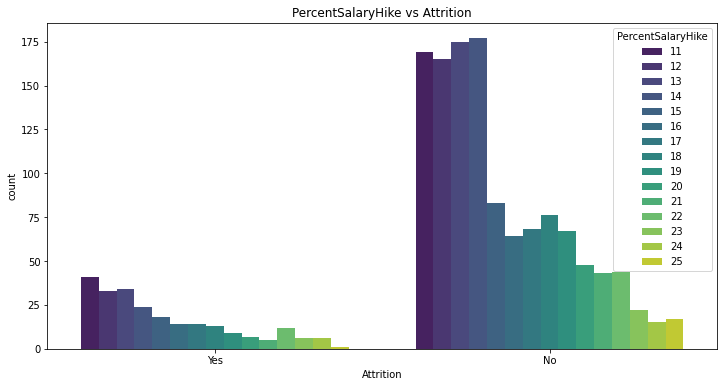

In [16]:
plt.figure(figsize=(12,6))
sns.countplot(x='Attrition',hue='PercentSalaryHike',data=df,palette='viridis')
plt.title("PercentSalaryHike vs Attrition")
plt.show()

Observation
* As above, I think the lesser the Salaryhike percentage the more the people will leave the organization. So, salary hike is also an important trigger for Attrition.

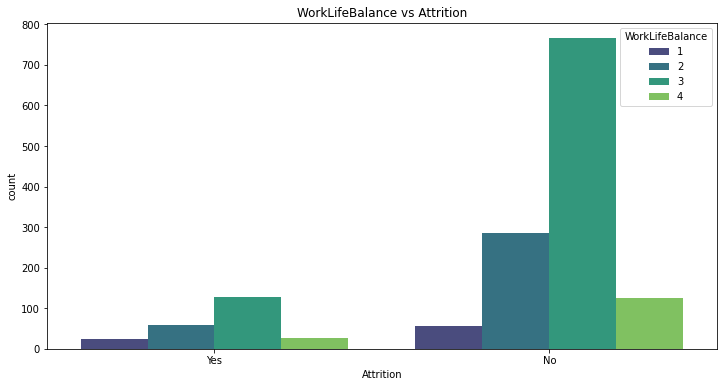

In [17]:
plt.figure(figsize=(12,6))
sns.countplot(x='Attrition',hue='WorkLifeBalance',data=df,palette='viridis')
plt.title("WorkLifeBalance vs Attrition")
plt.show()

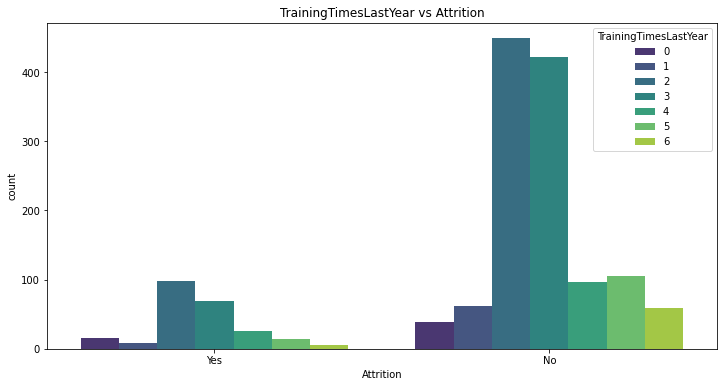

In [18]:
plt.figure(figsize=(12,6))
sns.countplot(x='Attrition',hue='TrainingTimesLastYear',data=df,palette='viridis')
plt.title("TrainingTimesLastYear vs Attrition")
plt.show()

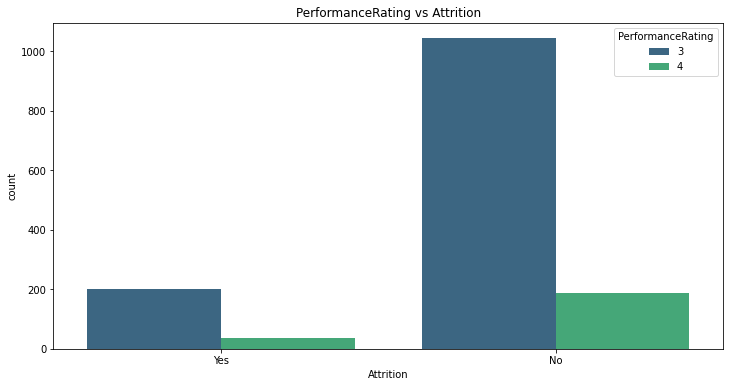

In [19]:
plt.figure(figsize=(12,6))
sns.countplot(x='Attrition',hue='PerformanceRating',data=df,palette='viridis')
plt.title("PerformanceRating vs Attrition")
plt.show()

* As we can see that, more employee churn due to lesser performance rating.

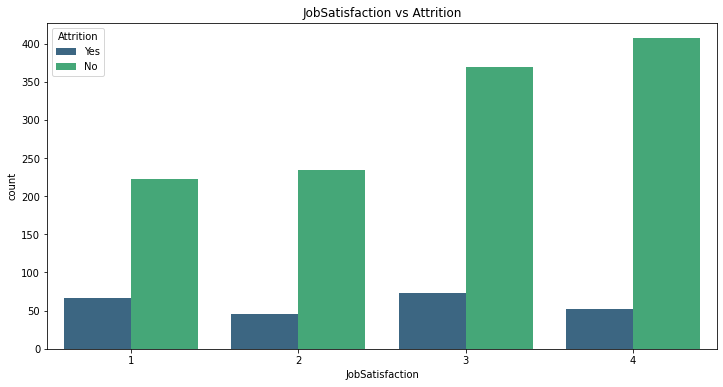

In [20]:
plt.figure(figsize=(12,6))
sns.countplot(x='JobSatisfaction',hue='Attrition',data=df,palette='viridis')
plt.title("JobSatisfaction vs Attrition")
plt.show()

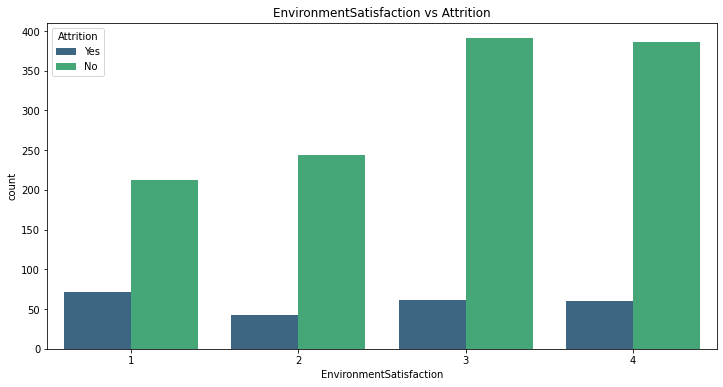

In [21]:
plt.figure(figsize=(12,6))
sns.countplot(x='EnvironmentSatisfaction',hue='Attrition',data=df,palette='viridis')
plt.title("EnvironmentSatisfaction vs Attrition")
plt.show()

* we can see that EnvironmentSatisfaction has a also played a vital role in traiggering Attrition level.

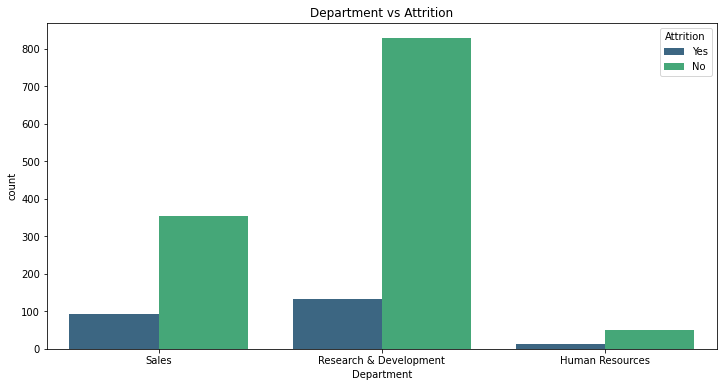

In [22]:
plt.figure(figsize=(12,6))
sns.countplot(x='Department',hue='Attrition',data=df,palette='viridis')
plt.title("Department vs Attrition")
plt.show()

The percentage of people leaving the company is evenly distributed among Sales and R&D Divisions. HR is very minimal which is expected

<AxesSubplot:xlabel='YearsSinceLastPromotion', ylabel='Density'>

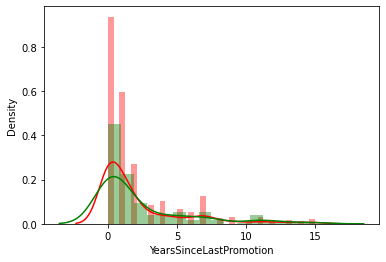

In [23]:
sns.distplot(df[df.PerformanceRating == 3]['YearsSinceLastPromotion'],color='r')
sns.distplot(df[df.PerformanceRating == 4]['YearsSinceLastPromotion'],color='g')

* Here we can notice some sort of relation between Performance Rating and Promotions, when an employee has been rated 4 then there is a high chances that he is getting promotions

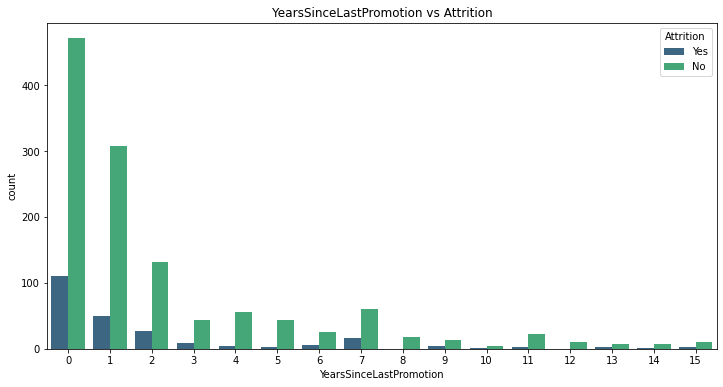

In [24]:
plt.figure(figsize=(12,6))
sns.countplot(x='YearsSinceLastPromotion',hue='Attrition',data=df,palette='viridis')
plt.title("YearsSinceLastPromotion vs Attrition")
plt.show()

* People who havent received promotions are the ones who is leaving the organization.
* We can also notice that people who have received promotions recently are also leaving the company.

[]

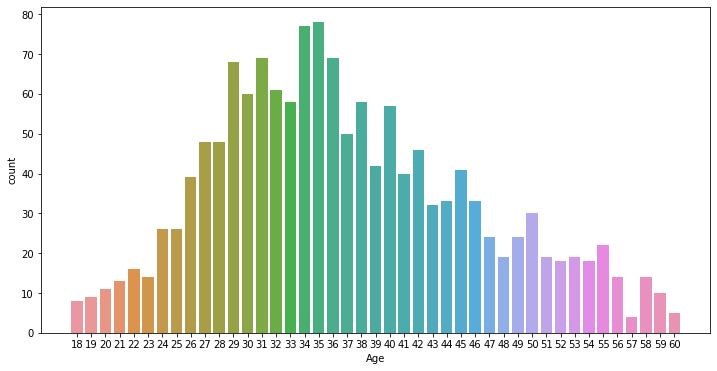

In [25]:
plt.figure(figsize=(12,6))
sns.countplot(x='Age',data=df)
plt.plot()

* As we can that the majority of the employee are aged between 29 to 40.

In [26]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance     

# LabelEncoder

In [27]:
enc = LabelEncoder()
df['Attrition'] = enc.fit_transform(df['Attrition'])

In [28]:
df['BusinessTravel'] = enc.fit_transform(df['BusinessTravel'])

In [29]:
df['Department'] = enc.fit_transform(df['Department'])

In [30]:
df['EducationField'] = enc.fit_transform(df['EducationField'])

In [31]:
df['Gender'] = enc.fit_transform(df['Gender'])

In [32]:
df['JobRole'] = enc.fit_transform(df['JobRole'])

In [33]:
df['MaritalStatus'] = enc.fit_transform(df['MaritalStatus'])

In [34]:
df['OverTime'] = enc.fit_transform(df['OverTime'])

* We have successfully converted all the object datatypes into Integer datatypes.

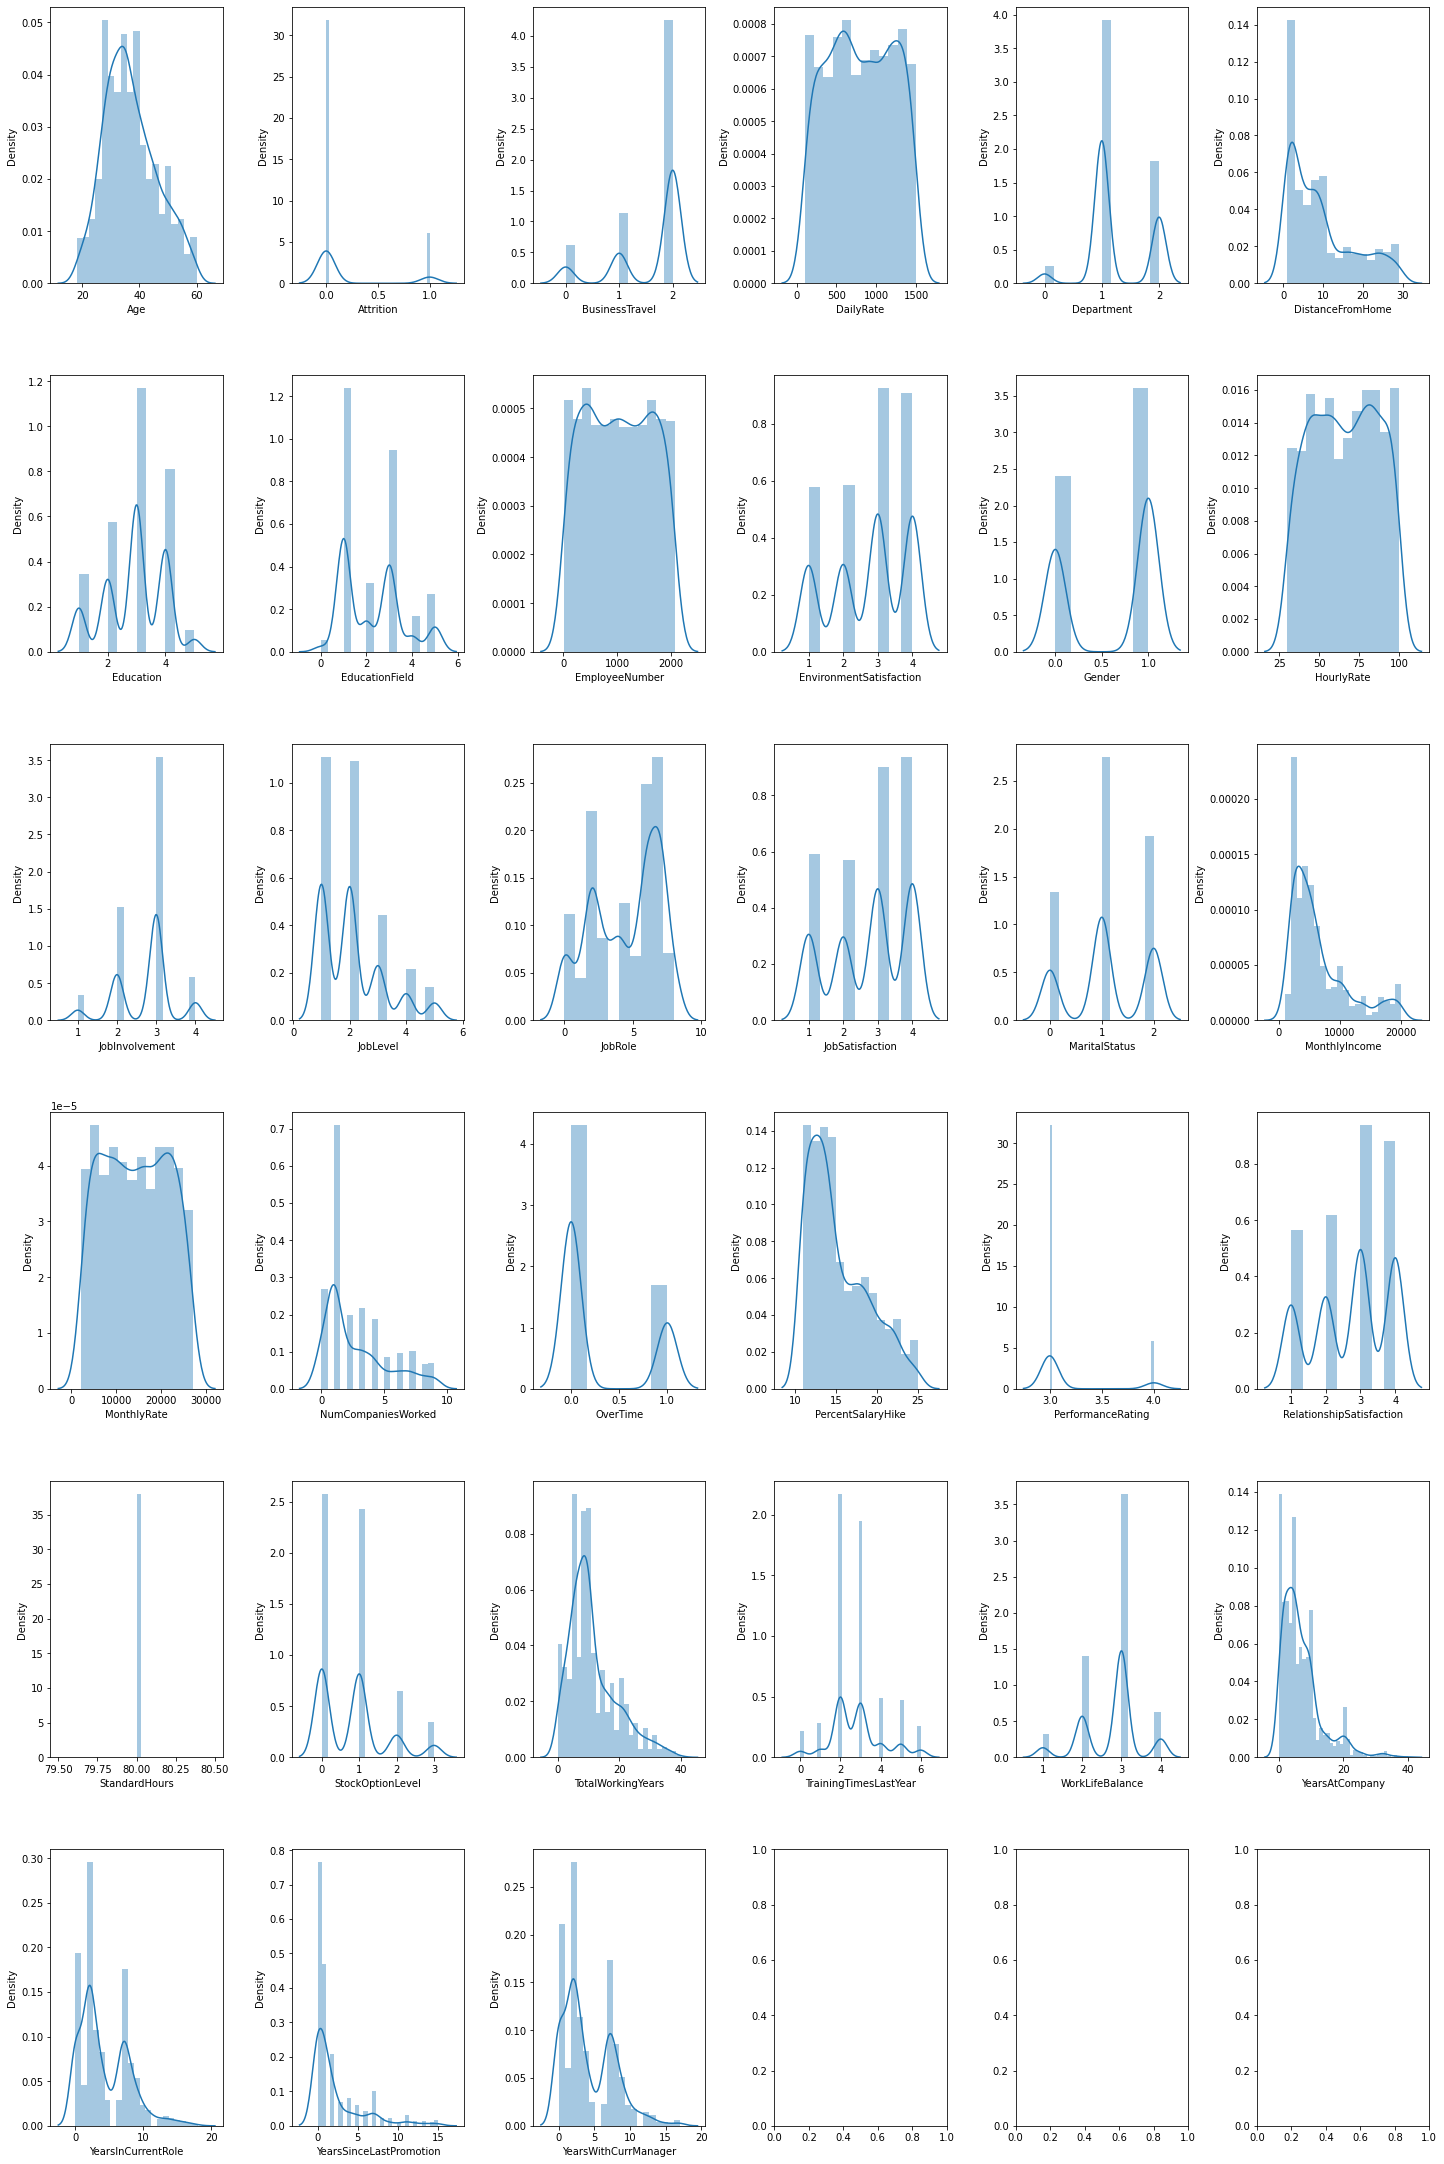

In [35]:
fig, ax = plt.subplots(ncols=6, nrows=6, figsize=(20,30))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col != ' types':
        sns.distplot(value, ax=ax[index])
        index+= 1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

In [36]:
df.skew().sort_values(ascending=False)

YearsSinceLastPromotion     1.984290
PerformanceRating           1.921883
Attrition                   1.844366
YearsAtCompany              1.764529
MonthlyIncome               1.369817
TotalWorkingYears           1.117172
NumCompaniesWorked          1.026471
JobLevel                    1.025401
StockOptionLevel            0.968980
OverTime                    0.964489
DistanceFromHome            0.958118
YearsInCurrentRole          0.917363
YearsWithCurrManager        0.833451
PercentSalaryHike           0.821128
TrainingTimesLastYear       0.553124
EducationField              0.550371
Age                         0.413286
Department                  0.172231
MonthlyRate                 0.018578
EmployeeNumber              0.016574
StandardHours               0.000000
DailyRate                  -0.003519
HourlyRate                 -0.032311
MaritalStatus              -0.152175
Education                  -0.289681
RelationshipSatisfaction   -0.302828
EnvironmentSatisfaction    -0.321654
J

In [37]:
# make the skew less than or equal to 0.5 for better prediction and plotting normal distribution
skew=('YearsSinceLastPromotion','YearsAtCompany','DistanceFromHome','MonthlyIncome','PercentSalaryHike','TotalWorkingYears','YearsAtCompany')
for col in skew:
    if df.skew().loc[col]>0.55:
        df[col] = np.log1p(df[col])

In [38]:
df.skew().sort_values(ascending=False)

PerformanceRating           1.921883
Attrition                   1.844366
NumCompaniesWorked          1.026471
JobLevel                    1.025401
StockOptionLevel            0.968980
OverTime                    0.964489
YearsInCurrentRole          0.917363
YearsWithCurrManager        0.833451
YearsSinceLastPromotion     0.718805
TrainingTimesLastYear       0.553124
EducationField              0.550371
PercentSalaryHike           0.513543
Age                         0.413286
MonthlyIncome               0.286448
Department                  0.172231
MonthlyRate                 0.018578
EmployeeNumber              0.016574
StandardHours               0.000000
DailyRate                  -0.003519
DistanceFromHome           -0.029121
HourlyRate                 -0.032311
MaritalStatus              -0.152175
YearsAtCompany             -0.207708
Education                  -0.289681
RelationshipSatisfaction   -0.302828
EnvironmentSatisfaction    -0.321654
JobSatisfaction            -0.329672
J

* I have tried to remove the skewness from some of the contineous type features, however, have not done any skewness correction for the categorical like features 

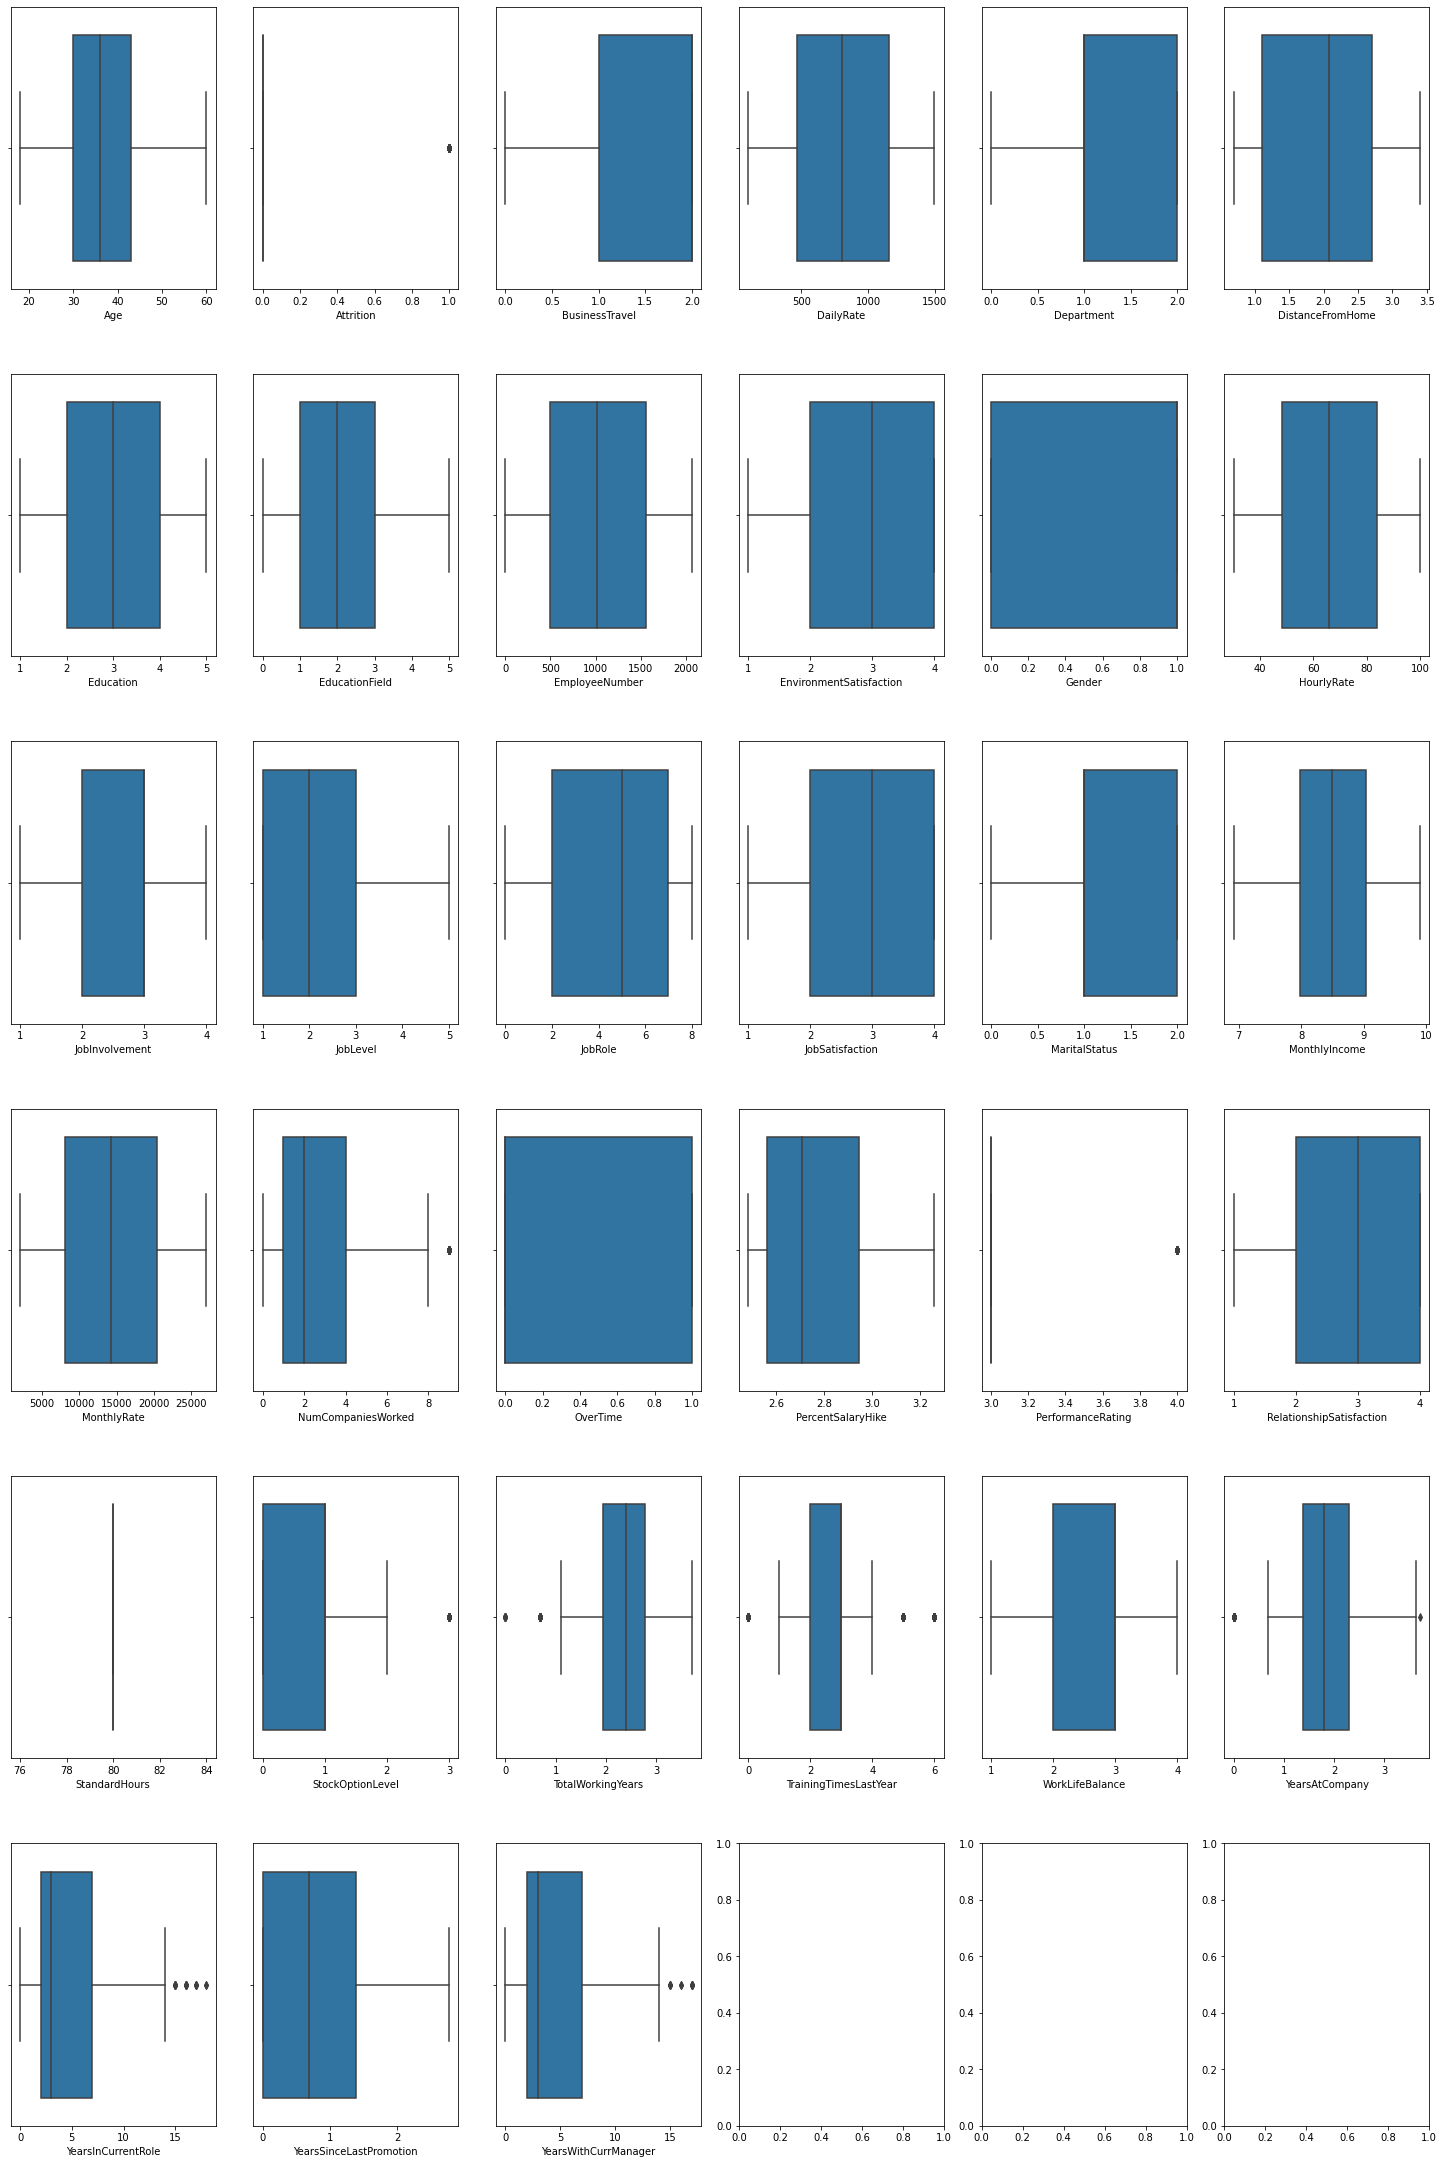

In [39]:
fig, ax = plt.subplots(ncols=6, nrows=6, figsize=(20,30))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col != ' types':
        sns.boxplot(value, ax=ax[index])
        index+= 1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

* Since many features are almost has categorical values, Hence. Outlier removal is not suited here.

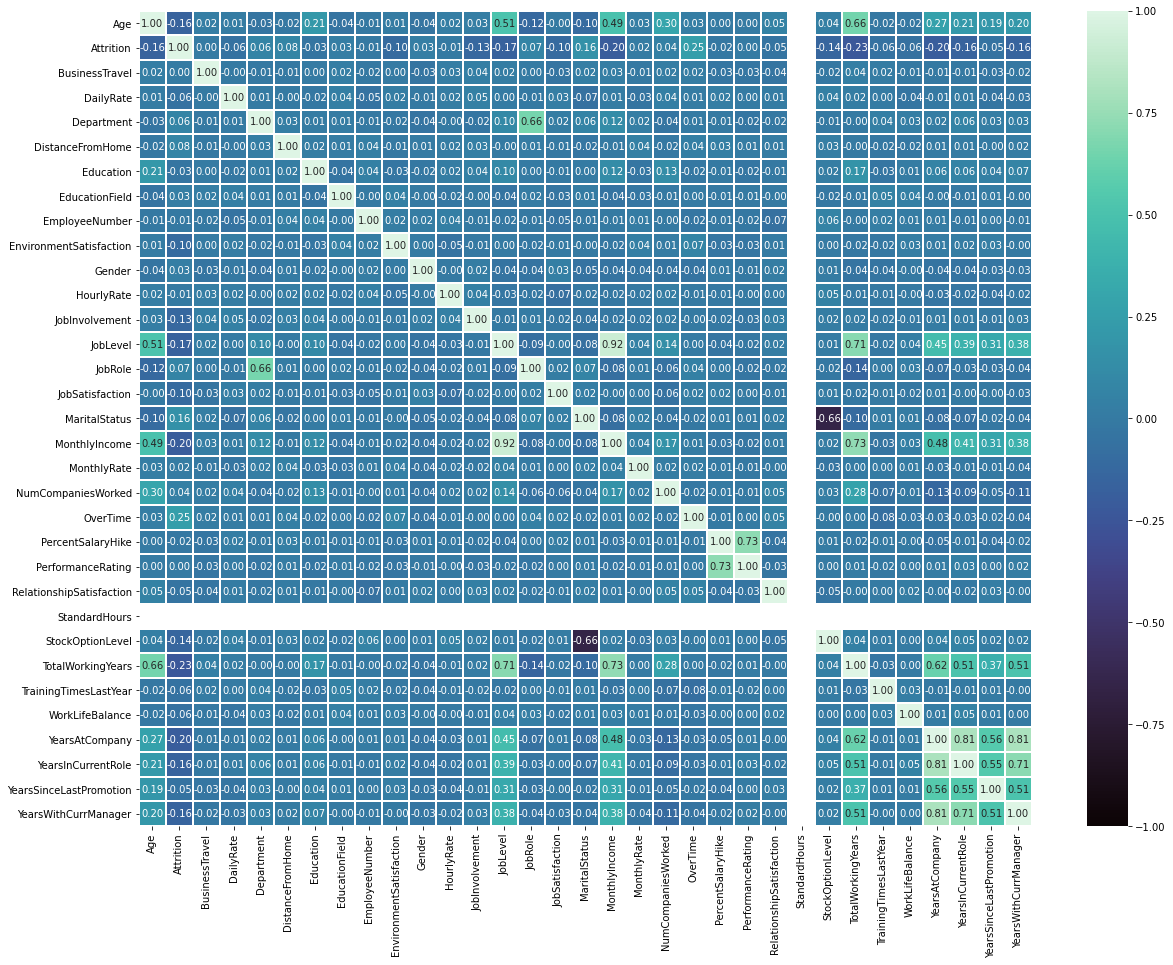

In [40]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,linewidth=0.1,linecolor='white',fmt='0.2f',vmin=-1,cmap='mako')
plt.show()

In [41]:
corr = df.corr()

In [42]:
corr['Attrition'].sort_values(ascending=False)

Attrition                   1.000000
OverTime                    0.246118
MaritalStatus               0.162070
DistanceFromHome            0.078073
JobRole                     0.067151
Department                  0.063991
NumCompaniesWorked          0.043494
Gender                      0.029453
EducationField              0.026846
MonthlyRate                 0.015170
PerformanceRating           0.002889
BusinessTravel              0.000074
HourlyRate                 -0.006846
EmployeeNumber             -0.010577
PercentSalaryHike          -0.017372
Education                  -0.031373
RelationshipSatisfaction   -0.045872
YearsSinceLastPromotion    -0.048475
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
Age                        -0.159205
Y

* its very interesting to see that the overtime, MaritalStatus and DistacnceFromHome are the ones which has highest correlation with the target variable.
* Also, dropping the StandardHours as its not contributing much to the dataset.

In [43]:
df.drop('StandardHours',axis=1,inplace=True)

# Drop and Standard Scaler:

In [44]:
x = df.drop('Attrition',axis=1)
y = df['Attrition']

In [45]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [63]:
maxAcc = 0
maxRS = 0
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=i)
    lr = LogisticRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAccu=acc
        maxRS=i
print('max accuracy score corresponing to random state',maxRS,'is',maxAccu)

max accuracy score corresponing to random state 99 is 0.8539094650205762


In [64]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=99)

# LogisticRegression

In [65]:
lr.fit(x_train,y_train)
predlr = lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.8539094650205762
[[386  19]
 [ 52  29]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.92       405
           1       0.60      0.36      0.45        81

    accuracy                           0.85       486
   macro avg       0.74      0.66      0.68       486
weighted avg       0.84      0.85      0.84       486



# RandomForestClassifier

In [66]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8559670781893004
[[402   3]
 [ 67  14]]
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       405
           1       0.82      0.17      0.29        81

    accuracy                           0.86       486
   macro avg       0.84      0.58      0.60       486
weighted avg       0.85      0.86      0.81       486



# DecisionTreeClassifier

In [67]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.742798353909465
[[332  73]
 [ 52  29]]
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       405
           1       0.28      0.36      0.32        81

    accuracy                           0.74       486
   macro avg       0.57      0.59      0.58       486
weighted avg       0.77      0.74      0.75       486



# Support Vector Machine

In [68]:
svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8477366255144033
[[397   8]
 [ 66  15]]
              precision    recall  f1-score   support

           0       0.86      0.98      0.91       405
           1       0.65      0.19      0.29        81

    accuracy                           0.85       486
   macro avg       0.75      0.58      0.60       486
weighted avg       0.82      0.85      0.81       486



# NearestCentroid

In [53]:
from sklearn.neighbors import NearestCentroid

In [69]:
nc = NearestCentroid()
nc.fit(x_train,y_train)
prednc = nc.predict(x_test)
print(accuracy_score(y_test,prednc))
print(confusion_matrix(y_test,prednc))
print(classification_report(y_test,prednc))

0.6625514403292181
[[269 136]
 [ 28  53]]
              precision    recall  f1-score   support

           0       0.91      0.66      0.77       405
           1       0.28      0.65      0.39        81

    accuracy                           0.66       486
   macro avg       0.59      0.66      0.58       486
weighted avg       0.80      0.66      0.70       486



# GaussianNB

In [55]:
from sklearn.naive_bayes import GaussianNB

In [70]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)
predgnb = gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.7757201646090535
[[334  71]
 [ 38  43]]
              precision    recall  f1-score   support

           0       0.90      0.82      0.86       405
           1       0.38      0.53      0.44        81

    accuracy                           0.78       486
   macro avg       0.64      0.68      0.65       486
weighted avg       0.81      0.78      0.79       486



# Cross-Validation Score

In [78]:
SCR = cross_val_score(lr,x,y,cv=5)
print('Cross Validation Score for LogisticRegression is ',SCR.mean())

Cross Validation Score for LogisticRegression is  0.8782312925170068


In [79]:
SCR = cross_val_score(rf,x,y,cv=5)
print('Cross Validation Score for RandomForestclassifier is ',SCR.mean())

Cross Validation Score for RandomForestclassifier is  0.8578231292517007


In [80]:
SCR = cross_val_score(dt,x,y,cv=5)
print('Cross Validation Score for DecisionTreeClassifier is ',SCR.mean())

Cross Validation Score for DecisionTreeClassifier is  0.7877551020408162


In [81]:
SCR = cross_val_score(svc,x,y,cv=5)
print('Cross Validation Score for SupportVectorClassifier is ',SCR.mean())

Cross Validation Score for SupportVectorClassifier is  0.863265306122449


In [76]:
SCR = cross_val_score(nc,x,y,cv=5)
print('Cross Validation Score for NearestCentroid is ',SCR.mean())

Cross Validation Score for NearestCentroid is  0.6782312925170068


In [77]:
SCR = cross_val_score(gnb,x,y,cv=5)
print('Cross Validation Score for GaussianNB is ',SCR.mean())

Cross Validation Score for GaussianNB is  0.8142857142857143


Observation
* Support vector has the highest accuracy but through cross validation score we get to know that the RandomForest is the best model to fit.

# Hyper Parameter Tuning

In [82]:
parameter = {'max_depth':np.arange(2,15),'criterion':['gini','entropy']}

In [84]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,cv=5)

In [85]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [86]:
GCV.best_params_

{'criterion': 'entropy', 'max_depth': 10}

In [88]:
mod=RandomForestClassifier(criterion='entropy',max_depth=10,random_state=99)
mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(accuracy_score(y_test,predrf)*100)

85.59670781893004


* As we can see that with the hyper parameter tuning we have arrived at 85% accuracy.

# Saving the Model

In [89]:
import pickle
filename = 'HRData.pkl'
pickle.dump(rf,open(filename,'wb'))

# Checking the Predictions

In [90]:
loaded_model = pickle.load(open('HRData.pkl','rb'))
result = loaded_model.score(x_test,y_test)*100
print(result)

85.59670781893004


* We are getting the 85% when testing the accuracy

In [94]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:],predrf[:]],index=['predicted','actual'])
conclusion.T

,predicted,actual
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [93]:
pd.set_option('display.max_rows',None)

In [92]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_curve

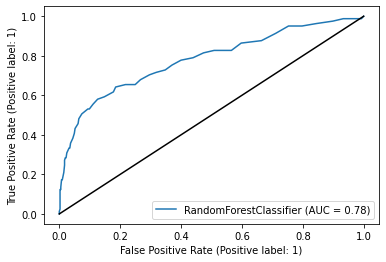

In [95]:
plot_roc_curve(rf,x_test,y_test)
plt.plot([0,1],[0,1],c='k')

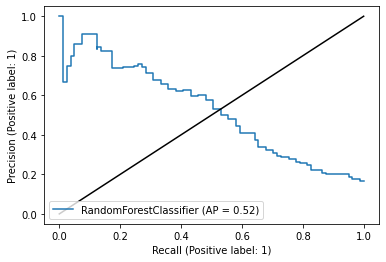

In [96]:
plot_precision_recall_curve(rf,x_test,y_test)
plt.plot([0,1],[0,1],c='k')